In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
data.shape

(42639, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

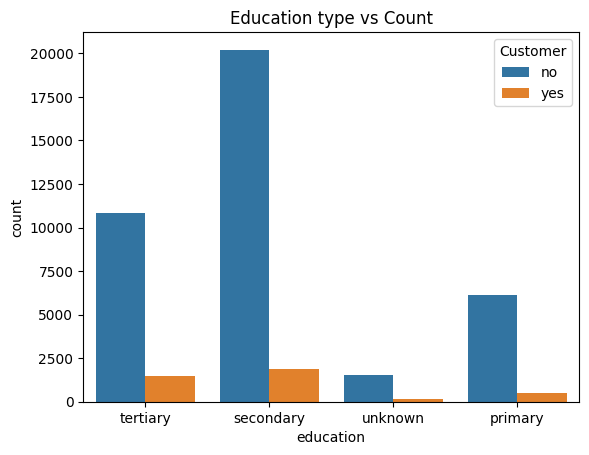

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

In [ ]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,42639.000000,42639.000000,42639.000000
mean,34.169141,2.816412,0.465442
std,92.041713,3.163564,2.166705
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,536.000000,63.000000,275.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

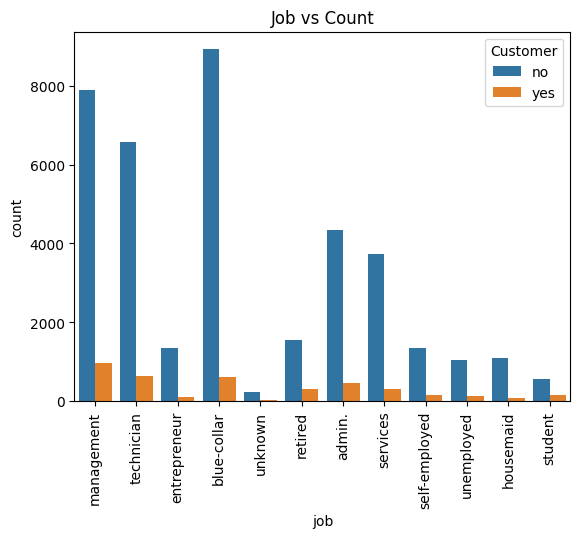

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

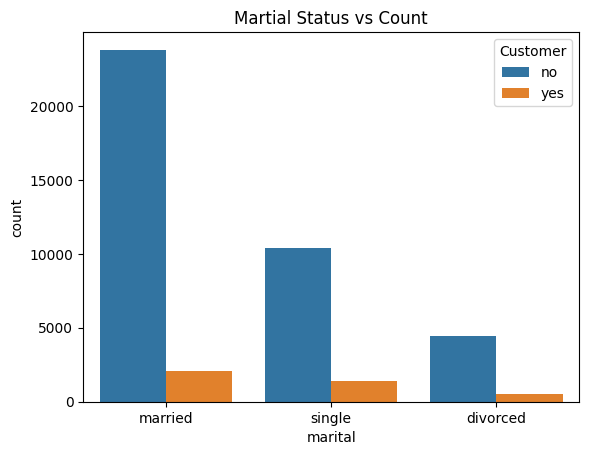

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

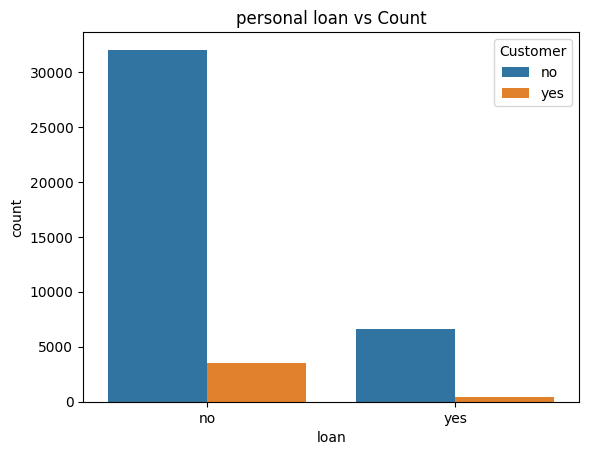

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

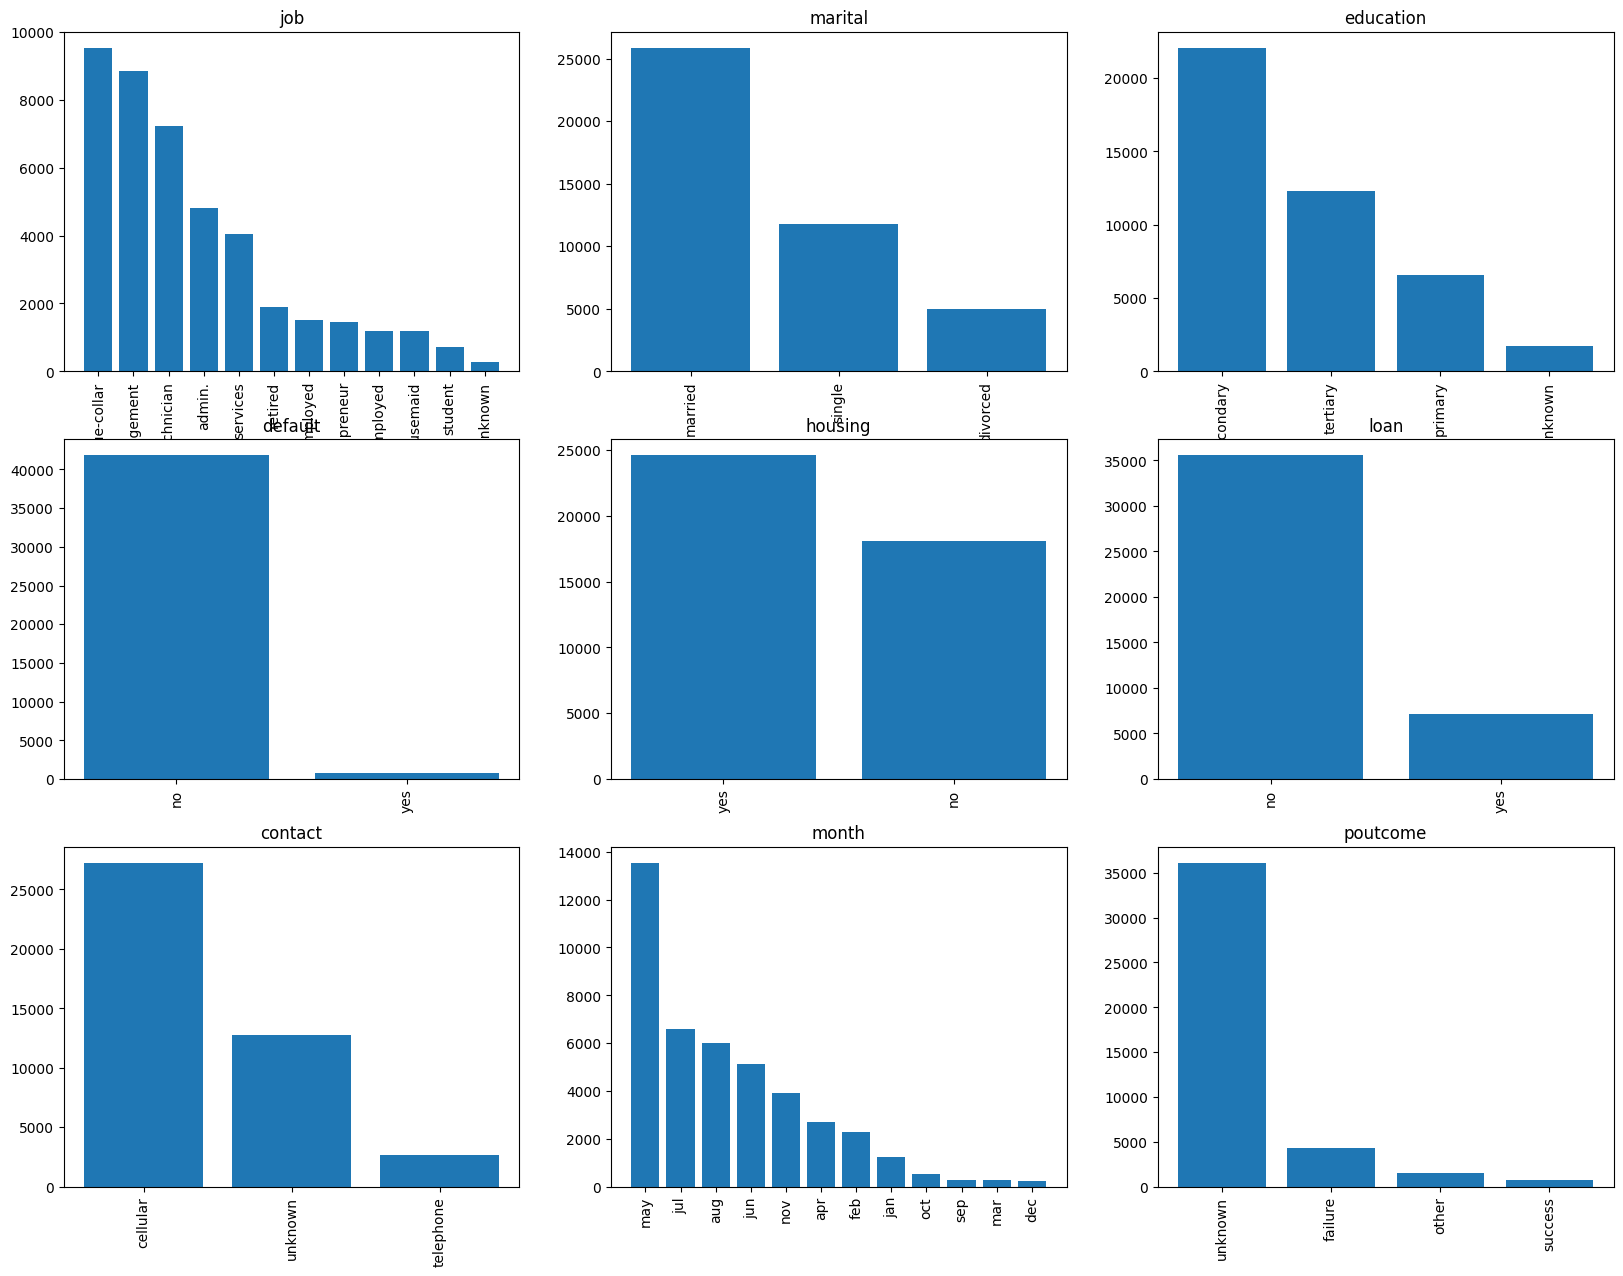

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

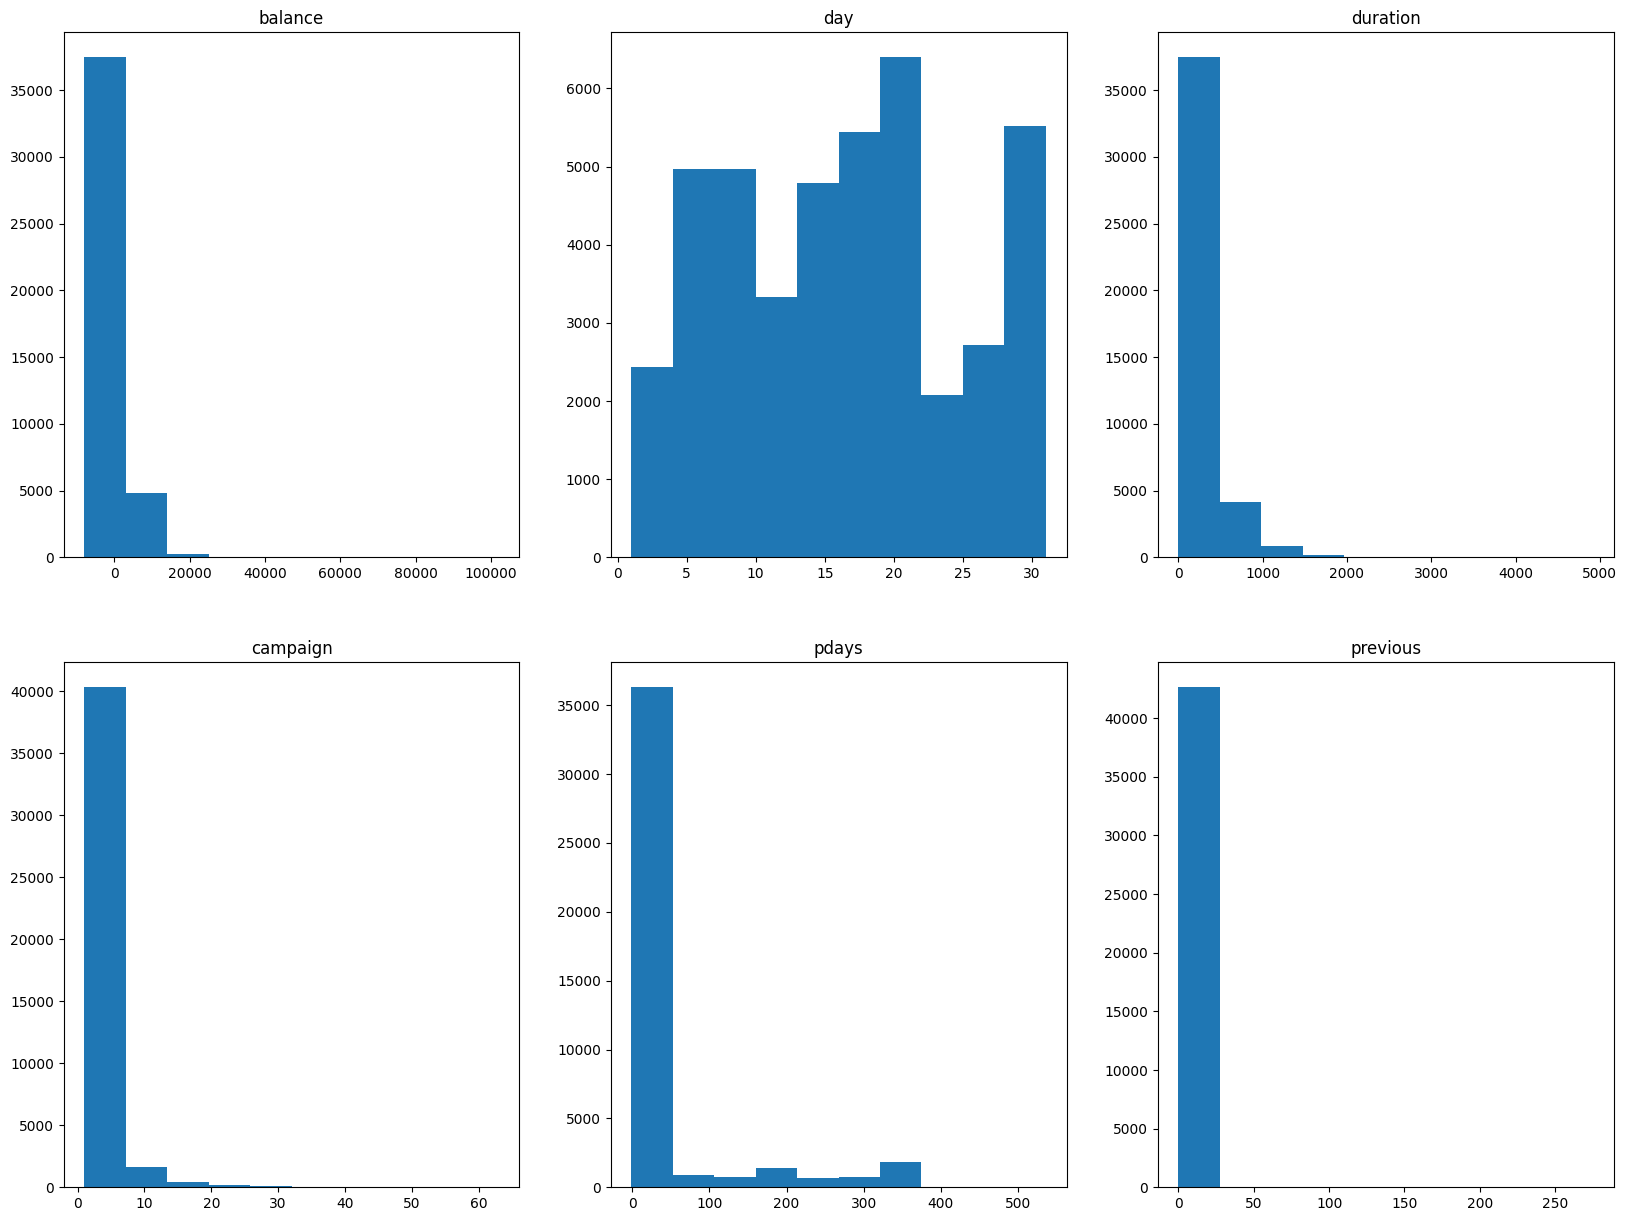

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

<ipython-input-13-4e0a91d102dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

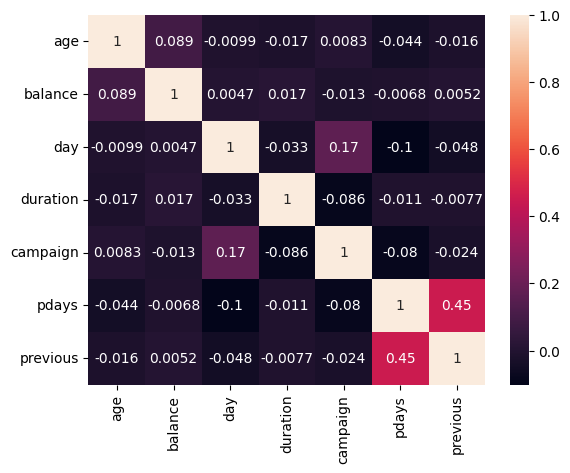

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
y = np.array(target)
X = df

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score'] 

In [ ]:
f_Scores  

,Specs,Score
0,"(age,)",0.210683
1,"(balance,)",0.823236
2,"(day,)",4.085821
3,"(duration,)",394.041452
4,"(campaign,)",12.788566
5,"(pdays,)",21.665815
6,"(previous,)",1.727698
7,"(job_blue-collar,)",94.699973
8,"(job_entrepreneur,)",7.837730
9,"(job_housemaid,)",8.143392


In [ ]:
print(f_Scores.nlargest(10,'Score')) 

                  Specs        Score
40  (poutcome_success,)  1685.493466
34         (month_oct,)   783.058572
31         (month_mar,)   469.515711
38   (contact_unknown,)   436.915876
35         (month_sep,)   394.344870
3           (duration,)   394.041452
26         (month_dec,)   355.971843
32         (month_may,)   190.496681
24       (housing_yes,)   180.351393
11       (job_retired,)   135.208372


In [ ]:
y = np.array(target)
X = df

In [ ]:

from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(X,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 38678), (1, 38678)]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Miscellanous libraries
from collections import Counter

Class=0, n=38678 (90.710%)
Class=1, n=38678 (90.710%)


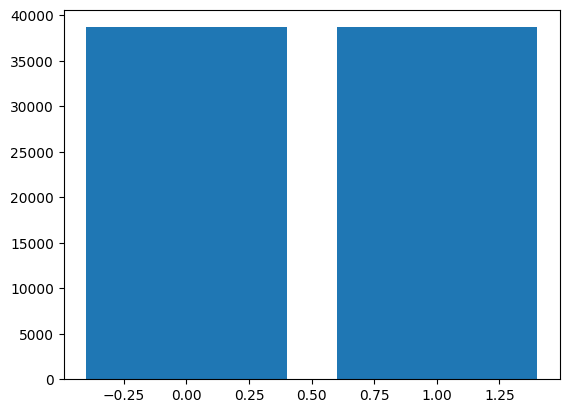

In [ ]:

counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
x_resampled.shape,y_resampled.shape

((77356, 42), (77356,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,train_size=0.80, shuffle=True, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((61884, 42), (15472, 42))

In [ ]:
y_test.shape

(15472,)

In [ ]:
f_score=chi2(X_train,y_train)

In [ ]:
f_score

(array([3.71513722e-02, 2.89402876e+00, 1.45695096e+01, 1.05570050e+03,
        7.02439552e+01, 5.47469541e+01, 4.96955551e+00, 4.40410321e+02,
        8.77641878e+01, 8.61718465e+01, 1.44002503e+02, 3.70005802e+02,
        5.53571643e+00, 1.27785832e+02, 3.10654916e+02, 2.47704534e+00,
        4.07899137e+00, 2.59750481e+00, 1.85676413e+02, 3.23637848e+02,
        5.64745828e+01, 4.23779088e+02, 2.16561255e+01, 1.51737196e+02,
        9.23784343e+02, 3.08055680e+00, 4.17981005e+02, 1.65612652e+01,
        2.71568400e+02, 2.05115722e+02, 1.21477065e+01, 6.09838293e+02,
        9.42511952e+02, 4.61547127e-01, 1.07434107e+03, 5.59079301e+02,
        7.66803778e+02, 1.46407042e+01, 2.64277763e+03, 6.38981897e+00,
        2.20177940e+03, 1.59014059e+02]),
 array([8.47157182e-001, 8.89083446e-002, 1.35082696e-004, 1.40381377e-231,
        5.24056168e-017, 1.37091511e-013, 2.57972761e-002, 8.81342558e-098,
        7.37420734e-021, 1.64959469e-020, 3.54849017e-033, 1.86608207e-082,
        1.

In [ ]:
pvalues=pd.Series(f_score[1])
pvalues.index=X_train.columns

In [ ]:
pvalues

age                     8.471572e-01
balance                 8.890834e-02
day                     1.350827e-04
duration               1.403814e-231
campaign                5.240562e-17
pdays                   1.370915e-13
previous                2.579728e-02
job_blue-collar         8.813426e-98
job_entrepreneur        7.374207e-21
job_housemaid           1.649595e-20
job_management          3.548490e-33
job_retired             1.866082e-82
job_self-employed       1.863214e-02
job_services            1.250326e-29
job_student             1.572375e-69
job_technician          1.155191e-01
job_unemployed          4.341957e-02
job_unknown             1.070321e-01
marital_married         2.793397e-42
marital_single          2.336215e-72
education_secondary     5.692952e-14
education_tertiary      3.671908e-94
education_unknown       3.261668e-06
default_yes             7.232095e-35
housing_yes            6.629253e-203
month_aug               7.923340e-02
month_dec               6.712850e-93
m

In [ ]:
pvalues.sort_values(ascending=False)

age                     8.471572e-01
month_nov               4.969018e-01
job_technician          1.155191e-01
job_unknown             1.070321e-01
balance                 8.890834e-02
month_aug               7.923340e-02
job_unemployed          4.341957e-02
previous                2.579728e-02
job_self-employed       1.863214e-02
poutcome_other          1.147767e-02
month_jun               4.914827e-04
day                     1.350827e-04
contact_telephone       1.300746e-04
month_feb               4.710334e-05
education_unknown       3.261668e-06
pdays                   1.370915e-13
education_secondary     5.692952e-14
campaign                5.240562e-17
job_housemaid           1.649595e-20
job_entrepreneur        7.374207e-21
job_services            1.250326e-29
job_management          3.548490e-33
default_yes             7.232095e-35
poutcome_unknown        1.858098e-36
marital_married         2.793397e-42
month_jul               1.597847e-46
month_jan               5.165198e-61
j

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
models = [LogisticRegression(max_iter=1000,random_state=1), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(n_estimators=350),BernoulliNB(),DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),XGBClassifier(n_estimators = 100)]

In [ ]:
def compare_models_train_test():

  for model in models:
    model.fit(X_train, y_train)
    
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)
    print(classification_report(test_data_prediction , y_test))
    cm=confusion_matrix(y_test,test_data_prediction)
    print(cm)

    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()  
    

Accuracy score of the  LogisticRegression(max_iter=1000, random_state=1)  =  0.8566442605997932
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7760
           1       0.86      0.86      0.86      7712

    accuracy                           0.86     15472
   macro avg       0.86      0.86      0.86     15472
weighted avg       0.86      0.86      0.86     15472

[[6660 1118]
 [1100 6594]]


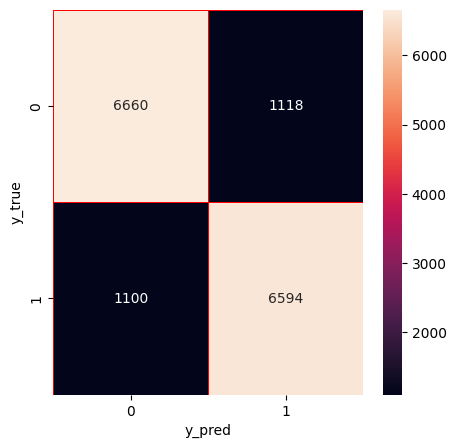

Accuracy score of the  SVC(kernel='linear')  =  0.858971044467425
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      7488
           1       0.88      0.85      0.86      7984

    accuracy                           0.86     15472
   macro avg       0.86      0.86      0.86     15472
weighted avg       0.86      0.86      0.86     15472

[[6542 1236]
 [ 946 6748]]


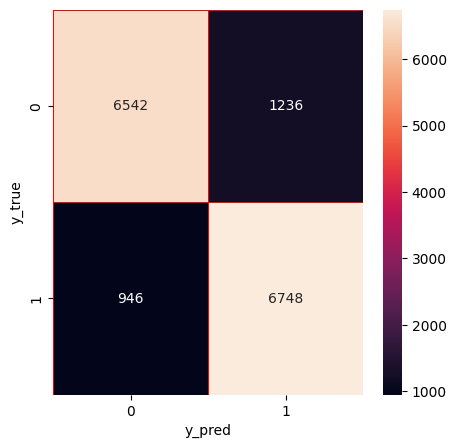

Accuracy score of the  KNeighborsClassifier()  =  0.9074457083764219
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6986
           1       0.96      0.87      0.91      8486

    accuracy                           0.91     15472
   macro avg       0.91      0.91      0.91     15472
weighted avg       0.91      0.91      0.91     15472

[[6666 1112]
 [ 320 7374]]


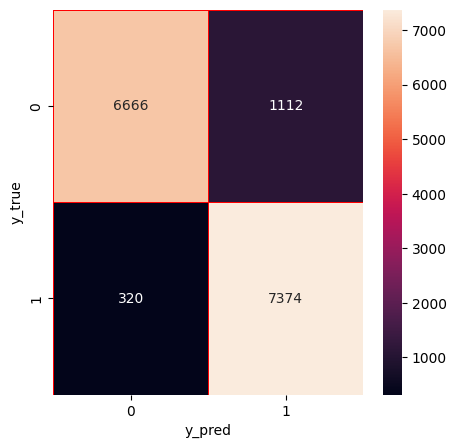

Accuracy score of the  RandomForestClassifier(n_estimators=350)  =  0.9520423991726991
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7444
           1       0.97      0.93      0.95      8028

    accuracy                           0.95     15472
   macro avg       0.95      0.95      0.95     15472
weighted avg       0.95      0.95      0.95     15472

[[7240  538]
 [ 204 7490]]


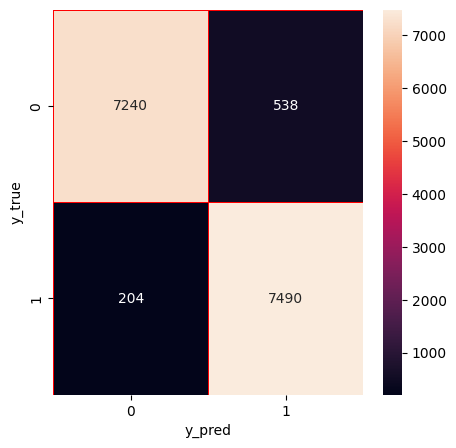

Accuracy score of the  BernoulliNB()  =  0.6387021716649431
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      8346
           1       0.60      0.65      0.62      7126

    accuracy                           0.64     15472
   macro avg       0.64      0.64      0.64     15472
weighted avg       0.64      0.64      0.64     15472

[[5267 2511]
 [3079 4615]]


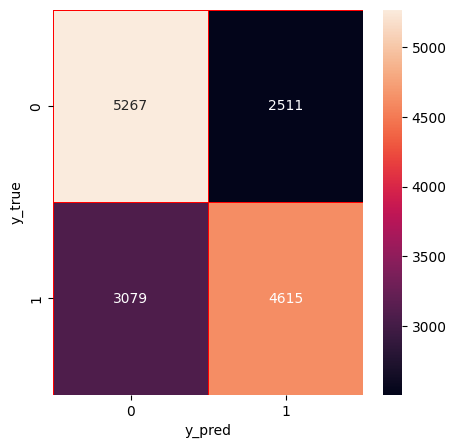

Accuracy score of the  DecisionTreeClassifier(max_depth=3, random_state=0)  =  0.7988624612202688
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      8432
           1       0.76      0.83      0.79      7040

    accuracy                           0.80     15472
   macro avg       0.80      0.80      0.80     15472
weighted avg       0.80      0.80      0.80     15472

[[6549 1229]
 [1883 5811]]


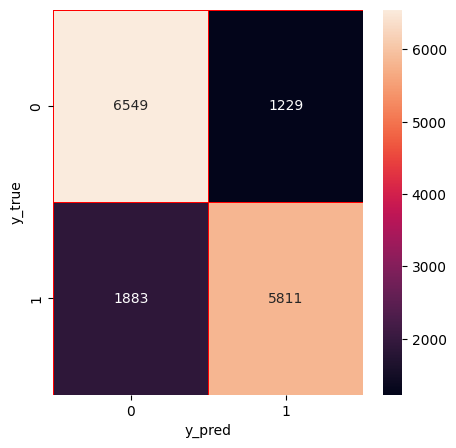

Accuracy score of the  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  =  0.9557264736297828
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7755
           1       0.96      0.95      0.96      7717

    accuracy                          

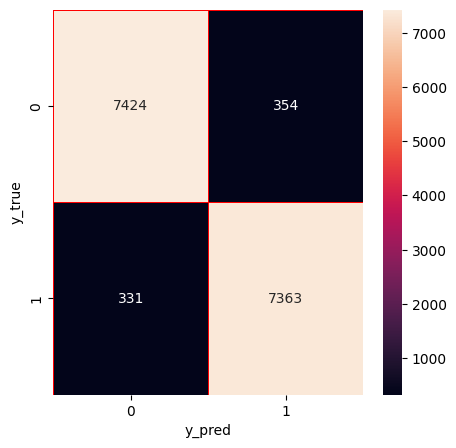

In [ ]:
compare_models_train_test()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000,random_state=1), X_train, y_train, cv=5)
print(cv_score_lr)


[0.86563788 0.86135574 0.8620021  0.86499152 0.86384939]


In [ ]:
cv_score_lr.mean()

0.8635673240589142

In [ ]:
cv_score_k = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
print(cv_score_k)
cv_score_k.mean()

[0.89399693 0.89270421 0.89504727 0.89375454 0.89334195]


0.8937689802367645

In [ ]:
cv_score_r = cross_val_score(RandomForestClassifier(n_estimators=350),X_train, y_train, cv=5)
print(cv_score_r)
cv_score_r.mean()

[0.95071504 0.94780642 0.94982629 0.95330048 0.95111506]


0.9505526559757843

In [ ]:
cv_score_b = cross_val_score(BernoulliNB(),X_train, y_train, cv=5)
print(cv_score_b)
cv_score_b.mean()

[0.64223964 0.63529127 0.64595621 0.63569524 0.63744344]


0.6393251586561997

In [ ]:
cv_score_d = cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),X_train, y_train, cv=5)
print(cv_score_d)
cv_score_d.mean()

[0.80067868 0.80601115 0.80439525 0.80940454 0.80486425]


0.8050707742466413

In [ ]:
cv_score_x = cross_val_score(XGBClassifier(n_estimators = 100),X_train, y_train, cv=5)
print(cv_score_x)
cv_score_x.mean()

[0.95523956 0.95071504 0.95677466 0.95580512 0.95200388]


0.9541076513513529

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  85.66


In [ ]:
results = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')
print(results)

[0.86621425 0.85522702 0.86201325 0.86362902 0.86893988 0.86635423
 0.86134454 0.86603103 0.86861668 0.86279897]


In [ ]:
results.mean()

0.864116886174284

In [ ]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics
    
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
   
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

In [ ]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtc.fit(X_train, y_train)


dtc_eval = evaluate_model(dtc, X_test, y_test)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])

Accuracy: 0.7988624612202688
Precision: 0.8254261363636364
Recall: 0.7552638419547699
F1 Score: 0.7887878376544049
Area Under Curve: 0.8617422063777493


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,random_state=1)
logreg.fit(X_train,y_train)


lr_eval = evaluate_model(logreg, X_test, y_test)
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Area Under Curve:', lr_eval['auc'])

Accuracy: 0.8566442605997932
Precision: 0.8550311203319502
Recall: 0.8570314530803224
F1 Score: 0.8560301181357912
Area Under Curve: 0.925338177979348


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=350)
rf.fit(X_train, y_train)

rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])

Accuracy: 0.9515253360910031
Precision: 0.9310901415445741
Recall: 0.9746555757733298
F1 Score: 0.9523749047498095
Area Under Curve: 0.9931980321747574


In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
nb_eval = evaluate_model(nb, X_test, y_test)
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])

Accuracy: 0.6387021716649431
Precision: 0.6476284030311535
Recall: 0.5998180400311931
F1 Score: 0.6228070175438596
Area Under Curve: 0.6932272264462837


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_eval = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])

Accuracy: 0.9074457083764219
Precision: 0.8689606410558567
Recall: 0.9584091499870029
F1 Score: 0.911495673671199
Area Under Curve: 0.9587474967386835


In [ ]:
from sklearn.svm import SVC

sv=SVC(kernel='linear',probability=True)
sv.fit(X_train, y_train)
sv_eval = evaluate_model(sv, X_test, y_test)
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Area Under Curve:', sv_eval['auc'])

Accuracy: 0.858971044467425
Precision: 0.8451903807615231
Recall: 0.8770470496490772
F1 Score: 0.8608240847046816
Area Under Curve: 0.9251542746221957


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
xgb_eval = evaluate_model(xgb, X_test, y_test)
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Area Under Curve:', xgb_eval['auc'])

Accuracy: 0.9557264736297828
Precision: 0.9541272515226125
Recall: 0.9569794645178061
F1 Score: 0.9555512296411655
Area Under Curve: 0.9931832353529177


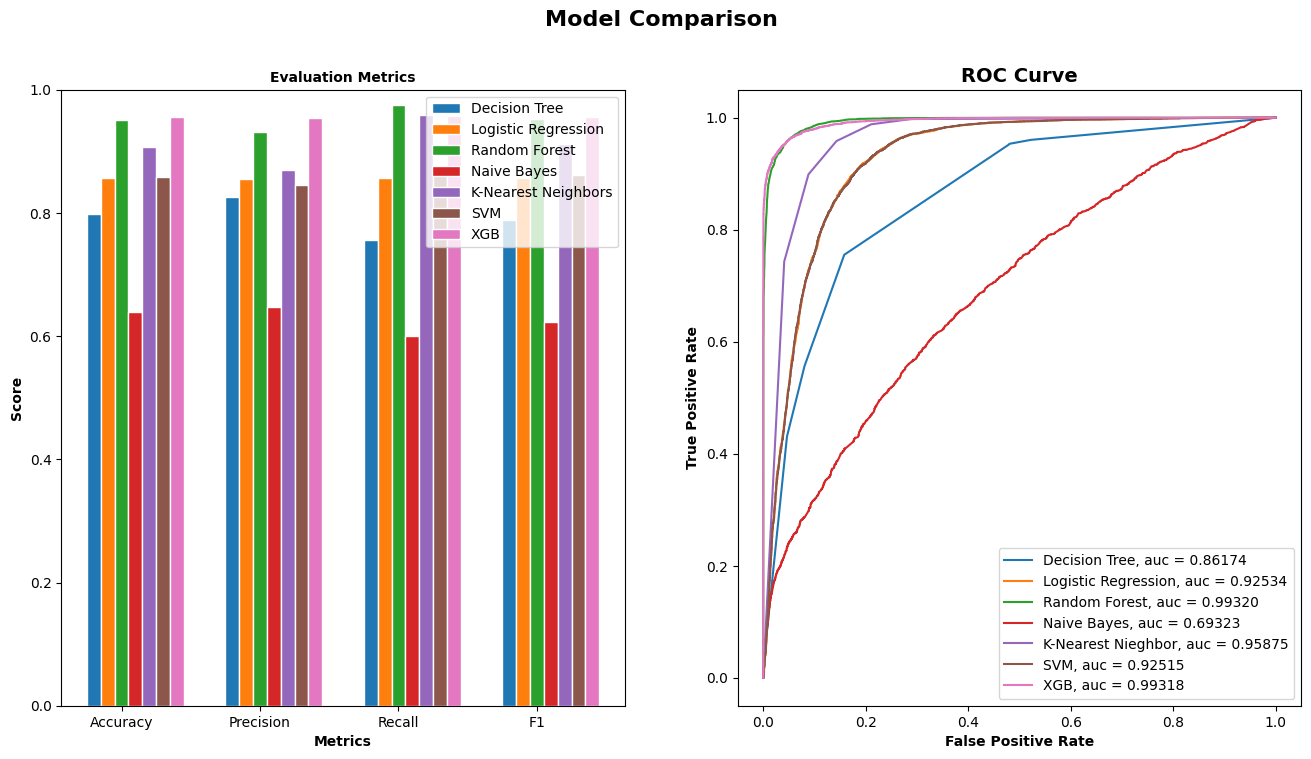

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.set_facecolor('white')


barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
sv_score = [sv_eval['acc'], sv_eval['prec'], sv_eval['rec'], sv_eval['f1']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1']]

r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, sv_score, width=barWidth, edgecolor='white', label='SVM')
ax1.bar(r7, xgb_score, width=barWidth, edgecolor='white', label='XGB')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 2) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=10, fontweight='bold')
ax1.legend()


ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(sv_eval['fpr'], sv_eval['tpr'], label='SVM, auc = {:0.5f}'.format(sv_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGB, auc = {:0.5f}'.format(xgb_eval['auc']))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')


ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()